In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [16]:
#load the saved model 
json_file = open('NN_108-56-5.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_108-56-5_weights.h5")

In [17]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_108-56-5.npy')
testY = np.load(path + 'TestY_NN_108-56-5.npy')
one_hot_test = np.load(path + 'OneHot_testY_108-56-5.npy')

In [18]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

AttributeError: 'Sequential' object has no attribute 'output_names'

In [6]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

212005/212005 [==============================] - 3s 16us/step


[0.0849876436410441, 0.7518030235141586]

In [7]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]


In [8]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


In [9]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


In [10]:
weights_first_layer_norm.shape, weights_second_layer_norm.shape

((109, 56), (57, 5))

In [11]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(276.33685, 3.7798572)

In [12]:
np.savetxt('weights_first_layer_norm_NN_108-56-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_108-56-5.txt',weights_second_layer_norm,delimiter= ',')


In [13]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,loaded_model.predict_classes(testX)) 

In [14]:
cfm

array([[    0,     0,     0,     0,     0,     0],
       [10066,  2101,     2,  7144,  1598,     0],
       [  164, 69145,     4,  3752,   285,     0],
       [  195,   289, 21871,   396,   769,     0],
       [ 2088, 16107,    22, 30461,  6502,     0],
       [  715,  2711,   256,  7519, 27843,     0]], dtype=int64)

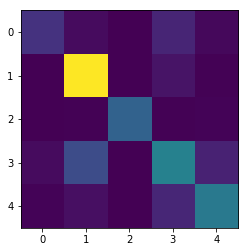

In [15]:
plt.imshow(cfm[1:,:-1])

In [16]:
a = [0 for x in range(5)]
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]

In [17]:
for idx in range(5):
    cfm_norm[idx,:] = cfm[idx+1,:-1] / sum(cfm[idx+1,:-1]) #len(testY[testY == idx + 1])      

In [18]:
cfm_norm, a

(array([[4.81373440e-01, 1.00473435e-01, 9.56434413e-05, 3.41638372e-01,
         7.64191096e-02],
        [2.23585549e-03, 9.42672120e-01, 5.45330607e-05, 5.11520109e-02,
         3.88548057e-03],
        [8.29081633e-03, 1.22874150e-02, 9.29889456e-01, 1.68367347e-02,
         3.26955782e-02],
        [3.78397970e-02, 2.91899239e-01, 3.98695179e-04, 5.52029721e-01,
         1.17832548e-01],
        [1.83126729e-02, 6.94344842e-02, 6.55670526e-03, 1.92577605e-01,
         7.13118533e-01]]), [0, 0, 0, 0, 0])

In [19]:
cfm_norm = np.around(cfm_norm,decimals=3)

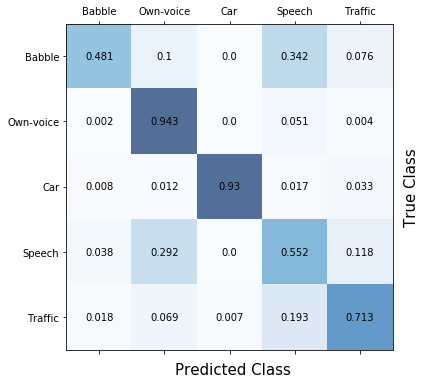

In [20]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
fig.savefig('Conf_Matrix_ERB=2.png',dpi=100)


In [23]:
FP = cfm_norm.sum(axis=0) - np.diag(cfm_norm)  
FN = cfm_norm.sum(axis=1) - np.diag(cfm_norm)
TP = np.diag(cfm_norm)
TN = cfm_norm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [31]:
ACC.mean(),TPR.mean(), FPR.mean()

(0.8895779155831167, 0.7238962962962964, 0.06901642910727682)